In [512]:
import pandas as pd
df_MNC_salary=pd.read_csv('MNC_Salary.csv')
df_MNC_salary

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0


In [513]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Team','Position','DOJ','College']
for i in list:
    df_MNC_salary[i]=le.fit_transform(df_MNC_salary[i].astype(str))

In [514]:
df_MNC_salary

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,1,0,2,25,4,180,93,7730337.0
1,Jae Crowder,1,99,3,25,7,235,52,6796117.0
2,John Holland,1,30,4,27,9,205,8,NaN
3,R.J. Hunter,1,28,4,22,9,185,33,1148640.0
4,Jonas Jerebko,1,8,1,29,11,231,118,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,28,41,1,20,11,234,45,2239800.0
453,Shelvin Mack,28,8,2,26,8,203,11,2433333.0
454,Raul Neto,28,25,2,24,5,179,118,900000.0
455,Tibor Pleiss,28,21,0,26,15,256,118,2900000.0


In [515]:
cor=df_MNC_salary.corr()
cor

,Team,Number,Position,Age,DOJ,Weight,College,Salary
Team,1.000000,-0.054748,-0.009638,-0.042344,0.004796,-0.001000,0.031684,-0.039569
Number,-0.054748,1.000000,-0.177229,0.028724,0.102402,0.206921,0.053274,-0.112386
Position,-0.009638,-0.177229,1.000000,-0.062992,-0.547383,-0.590791,-0.092516,-0.094926
Age,-0.042344,0.028724,-0.062992,1.000000,0.044540,0.087183,0.051550,0.213459
DOJ,0.004796,0.102402,-0.547383,0.044540,1.000000,0.458881,0.150479,0.039443
Weight,-0.001000,0.206921,-0.590791,0.087183,0.458881,1.000000,0.045000,0.138321
College,0.031684,0.053274,-0.092516,0.051550,0.150479,0.045000,1.000000,0.051041
Salary,-0.039569,-0.112386,-0.094926,0.213459,0.039443,0.138321,0.051041,1.000000


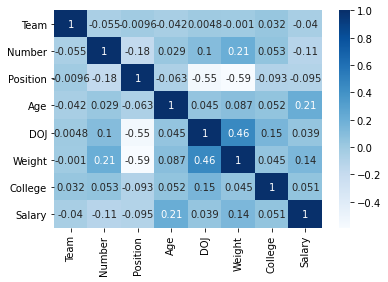

In [516]:
sns.heatmap(cor,annot=True,cmap='Blues')
plt.show()

from correlation heatmap we find that position-weight, Position-DOJ are highly non-correlated whereas Salary-Age has quite a good linear relation.Please see the plots below

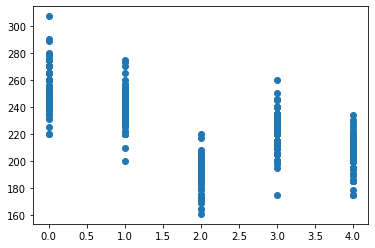

In [517]:
plt.scatter(df_MNC_salary['Position'],df_MNC_salary['Weight'])

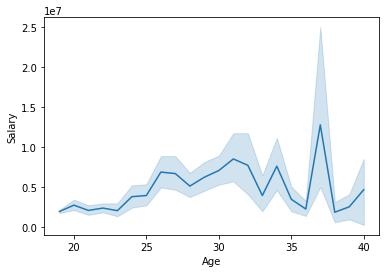

In [518]:
sns.lineplot(x='Age',y='Salary',data=df_MNC_salary)
plt.show()

In [519]:
df_MNC_salary.drop(['Name'],axis=1,inplace=True)

In [520]:
df_MNC_salary

,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,1,0,2,25,4,180,93,7730337.0
1,1,99,3,25,7,235,52,6796117.0
2,1,30,4,27,9,205,8,NaN
3,1,28,4,22,9,185,33,1148640.0
4,1,8,1,29,11,231,118,5000000.0
...,...,...,...,...,...,...,...,...
452,28,41,1,20,11,234,45,2239800.0
453,28,8,2,26,8,203,11,2433333.0
454,28,25,2,24,5,179,118,900000.0
455,28,21,0,26,15,256,118,2900000.0


In [521]:
df_MNC_salary.isnull().sum()

Team         0
Number       0
Position     0
Age          0
DOJ          0
Weight       0
College      0
Salary      11
dtype: int64

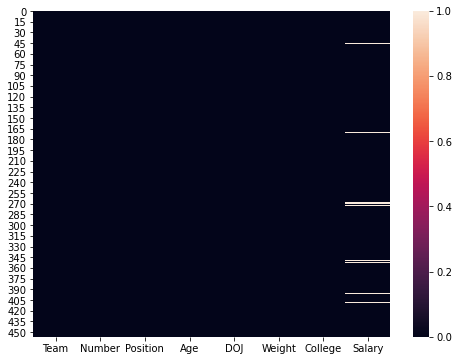

In [522]:
plt.figure(figsize=(8,6))
sns.heatmap(df_MNC_salary.isnull())
plt.show()

In [487]:
from sklearn.impute import SimpleImputer

In [488]:
imp=SimpleImputer(strategy='mean')
df_MNC_salary['Salary']=imp.fit_transform(df_MNC_salary['Salary'].values.reshape(-1,1))
df_MNC_salary['Salary']

0      7.730337e+06
1      6.796117e+06
2      4.842684e+06
3      1.148640e+06
4      5.000000e+06
           ...     
452    2.239800e+06
453    2.433333e+06
454    9.000000e+05
455    2.900000e+06
456    9.472760e+05
Name: Salary, Length: 457, dtype: float64

In [489]:
df_MNC_salary

,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,1,0,2,25,4,180,93,7.730337e+06
1,1,99,3,25,7,235,52,6.796117e+06
2,1,30,4,27,9,205,8,4.842684e+06
3,1,28,4,22,9,185,33,1.148640e+06
4,1,8,1,29,11,231,118,5.000000e+06
...,...,...,...,...,...,...,...,...
452,28,41,1,20,11,234,45,2.239800e+06
453,28,8,2,26,8,203,11,2.433333e+06
454,28,25,2,24,5,179,118,9.000000e+05
455,28,21,0,26,15,256,118,2.900000e+06


In [490]:
df_MNC_salary.isnull().sum()

Team        0
Number      0
Position    0
Age         0
DOJ         0
Weight      0
College     0
Salary      0
dtype: int64

In [491]:
df_MNC_salary.dtypes

Team          int32
Number        int64
Position      int32
Age           int64
DOJ           int32
Weight        int64
College       int32
Salary      float64
dtype: object

In [492]:
df_MNC_salary.skew()

Team       -0.007368
Number      1.668386
Position   -0.014795
Age         0.626349
DOJ         0.192022
Weight      0.113788
College    -0.127550
Salary      1.595511
dtype: float64

We can see that Number and Salary columns data is highly skewed also Age column is somewhat moderately skewed.So there might be outliers present in these data columns

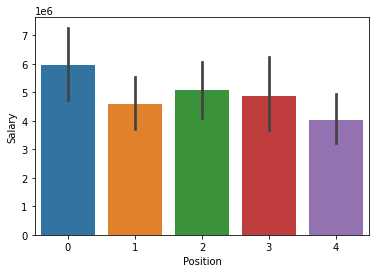

In [493]:
sns.barplot(x='Position',y='Salary',data=df_MNC_salary)
plt.show()

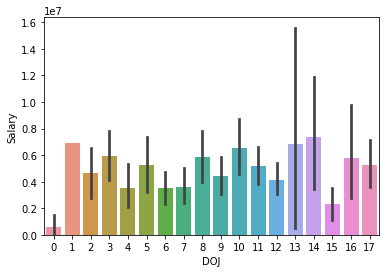

In [494]:
sns.barplot(x='DOJ',y='Salary',data=df_MNC_salary)
plt.show()

There is no significant correlation between Salary-Position and Salary-DOJ

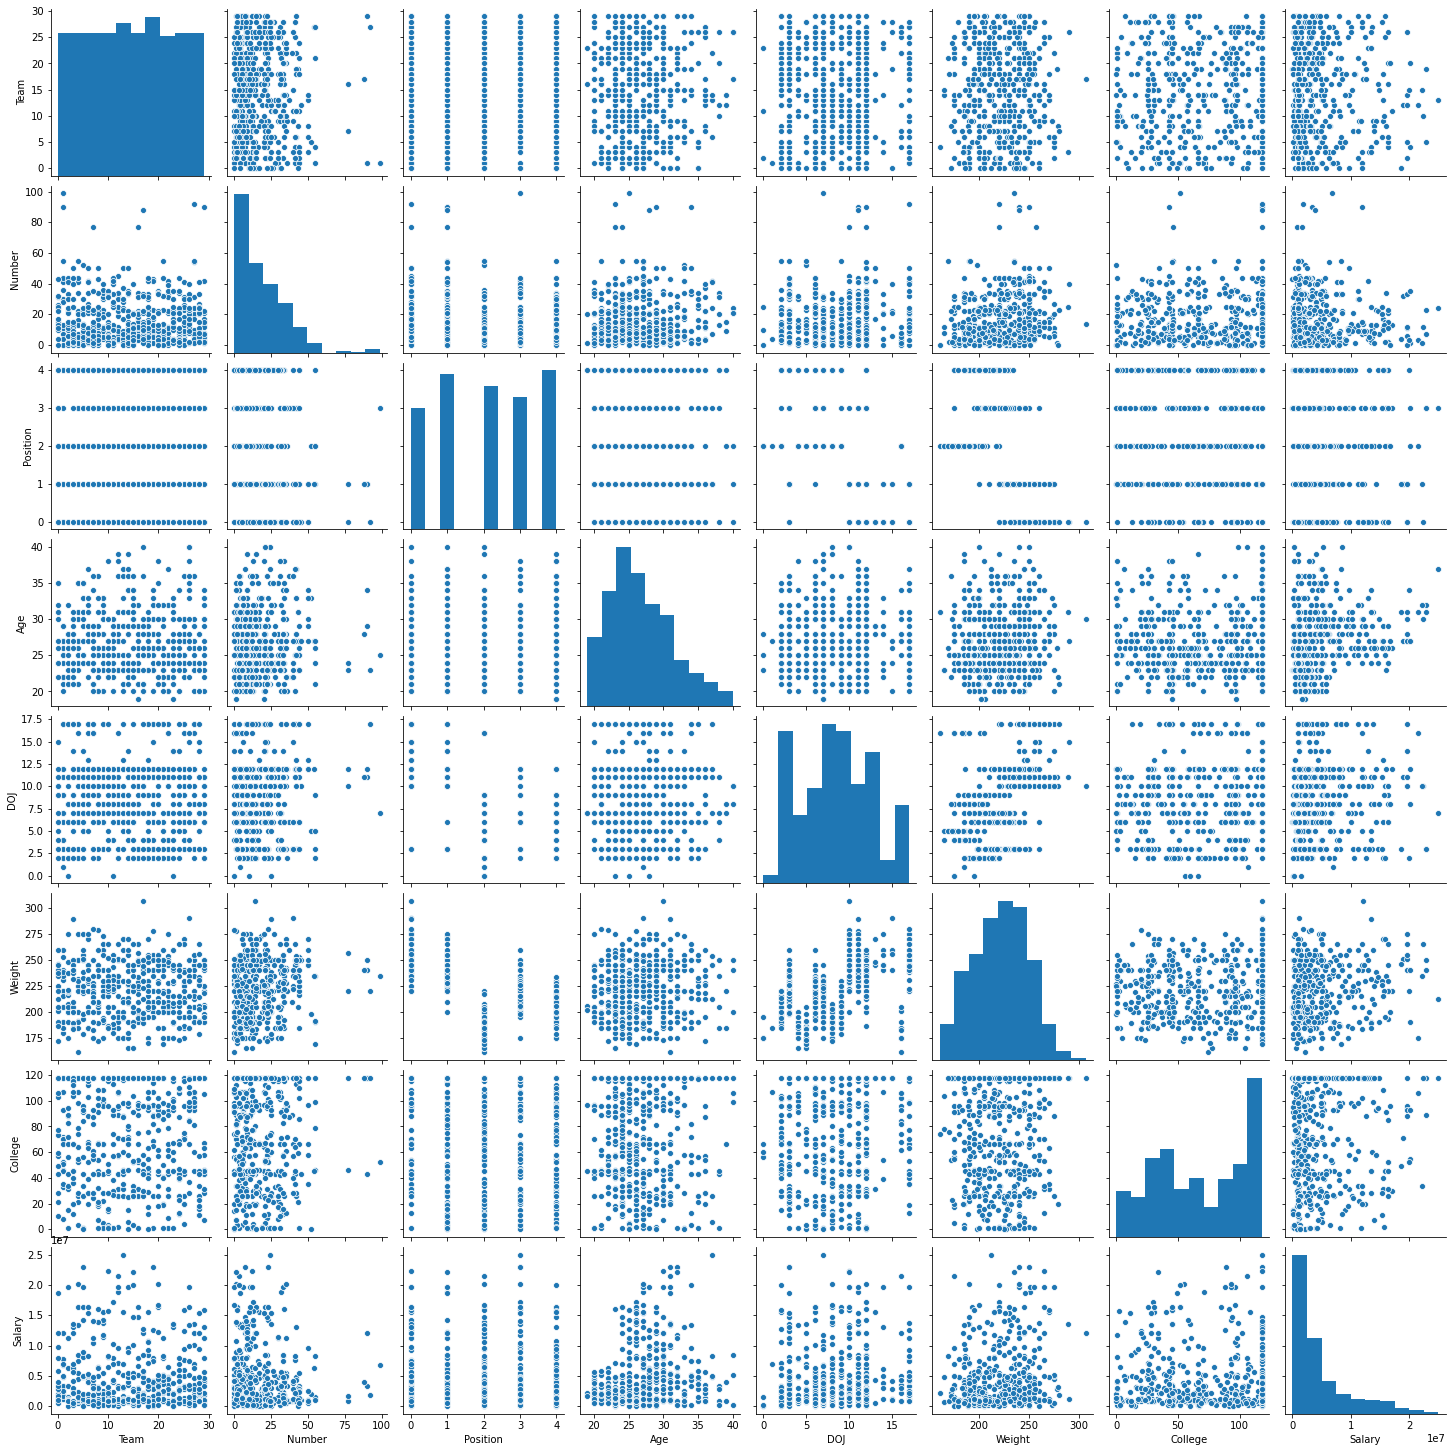

In [495]:
sns.pairplot(df_MNC_salary)

In [496]:
df_MNC_salary.describe()

,Team,Number,Position,Age,DOJ,Weight,College,Salary
count,457.000000,457.000000,457.00000,457.000000,457.000000,457.000000,457.000000,4.570000e+02
mean,14.520788,17.678337,2.07221,26.938731,8.509847,221.522976,68.680525,4.842684e+06
std,8.601312,15.966090,1.40692,4.404016,4.128476,26.368343,37.595707,5.165781e+06
min,0.000000,0.000000,0.00000,19.000000,0.000000,161.000000,0.000000,3.088800e+04
25%,7.000000,5.000000,1.00000,24.000000,6.000000,200.000000,39.000000,1.100602e+06
50%,15.000000,13.000000,2.00000,26.000000,9.000000,220.000000,66.000000,2.869440e+06
75%,22.000000,25.000000,3.00000,30.000000,11.000000,240.000000,104.000000,6.331404e+06
max,29.000000,99.000000,4.00000,40.000000,17.000000,307.000000,118.000000,2.500000e+07


In Number column Standard Deviation is hight and there is very high difference between Q3 and Max so, there are outliers present in this Number column. Please see the plots below

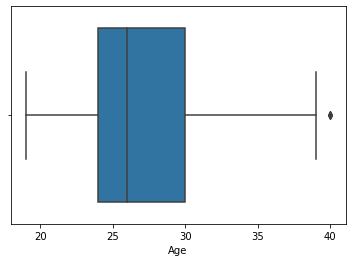

In [497]:
sns.boxplot(x='Age',data=df_MNC_salary)

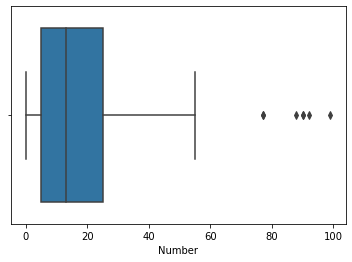

In [499]:
sns.boxplot(x='Number',data=df_MNC_salary)

In [500]:
df_MNC_salary.columns

Index(['Team', 'Number', 'Position', 'Age', 'DOJ', 'Weight', 'College',
       'Salary'],
      dtype='object')

In [501]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
for col in df_MNC_salary.columns:
    if df_MNC_salary.skew().loc[col]>0.5:
        df_MNC_salary[col]=np.log(df_MNC_salary[col])

In [503]:
df_MNC_salary.skew()

Team       -0.007368
Number           NaN
Position   -0.014795
Age         0.272628
DOJ         0.192022
Weight      0.113788
College    -0.127550
Salary     -0.450096
dtype: float64

In [504]:
df_MNC_salary

,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,1,-inf,2,3.218876,4,180,93,15.860663
1,1,4.595120,3,3.218876,7,235,52,15.731862
2,1,3.401197,4,3.295837,9,205,8,15.392980
3,1,3.332205,4,3.091042,9,185,33,13.954089
4,1,2.079442,1,3.367296,11,231,118,15.424948
...,...,...,...,...,...,...,...,...
452,28,3.713572,1,2.995732,11,234,45,14.621897
453,28,2.079442,2,3.258097,8,203,11,14.704772
454,28,3.218876,2,3.178054,5,179,118,13.710150
455,28,3.044522,0,3.258097,15,256,118,14.880221


In [505]:
df_MNC_salary.drop('Number',axis=1,inplace=True)

In [506]:
df_MNC_salary

,Team,Position,Age,DOJ,Weight,College,Salary
0,1,2,3.218876,4,180,93,15.860663
1,1,3,3.218876,7,235,52,15.731862
2,1,4,3.295837,9,205,8,15.392980
3,1,4,3.091042,9,185,33,13.954089
4,1,1,3.367296,11,231,118,15.424948
...,...,...,...,...,...,...,...
452,28,1,2.995732,11,234,45,14.621897
453,28,2,3.258097,8,203,11,14.704772
454,28,2,3.178054,5,179,118,13.710150
455,28,0,3.258097,15,256,118,14.880221


In [507]:
from scipy.stats import zscore
z=np.abs(zscore(df_MNC_salary))
z

array([[1.57366745, 0.05138118, 0.38765053, ..., 1.57645405, 0.6475773 ,
        0.88822678],
       [1.57366745, 0.66017031, 0.38765053, ..., 0.51166634, 0.44416787,
        0.7806213 ],
       [1.57366745, 1.37172179, 0.09503516, ..., 0.62730842, 1.61579683,
        0.49750562],
       ...,
       [1.56882854, 0.05138118, 0.64367868, ..., 1.61441988, 1.31327557,
        0.9083969 ],
       [1.56882854, 1.47448415, 0.14166533, ..., 1.30894867, 1.31327557,
        0.06912695],
       [1.56882854, 1.47448415, 0.14166533, ..., 0.35980304, 0.68381925,
        0.86562596]])

In [398]:
df_salary_final=df_MNC_salary[(z<3).all(axis=1)]

In [399]:
df_salary_final.shape

(453, 7)

In [402]:
x=df_salary_final.drop(columns=['Salary'])
y=df_salary_final['Salary']

In [401]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4,5
0,-1.564502,-0.050292,-0.387596,-1.099363,-1.592464,0.654423
1,-1.564502,0.661649,-0.387596,-0.371276,0.519210,-0.437340
2,-1.564502,1.373589,0.093795,0.114115,-0.632612,-1.608989
3,-1.564502,1.373589,-1.187193,0.114115,-1.400494,-0.943279
4,-1.564502,-0.762232,0.540771,0.599506,0.365634,1.320133
...,...,...,...,...,...,...
448,1.569371,-0.762232,-1.783358,0.599506,0.480816,-0.623739
449,1.569371,-0.050292,-0.142270,-0.128580,-0.709401,-1.529104
450,1.569371,-0.050292,-0.642937,-0.856667,-1.630859,1.320133
451,1.569371,-1.474172,-0.142270,1.570289,1.325486,1.320133


In [407]:
y

0      15.860663
1      15.731862
2      15.392980
3      13.954089
4      15.424948
         ...    
452    14.621897
453    14.704772
454    13.710150
455    14.880221
456    13.761346
Name: Salary, Length: 453, dtype: float64

In [408]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [409]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr.score(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state        
print('max r2 score corresponding to ',final_r_state,'is',max_r_score)        

max r2 score corresponding to  99 is 0.08653968975753223


In [411]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.20)

In [412]:
x_train.shape

(362, 6)

In [413]:
x_test.shape

(91, 6)

In [414]:
print(lr.score(x_train,y_train))

0.036219855858177774


In [415]:
print(mean_squared_error(y_test,y_pred))

1.2602126891514285


In [416]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

1.1225919513124207


In [418]:
model=[DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print(mean_squared_error(y_test,predm))
    print(r2_score(y_test,predm))
    print(np.sqrt(mean_squared_error(y_test,predm)))
    print('\n')

1.0
2.4562668204952076
-0.7804155371571779
1.5672481681262886


0.004161036426945985
1.4050534944591762
-0.018447609681004007
1.1853495241738514


0.1775975910727169
1.5765813008471141
-0.14277887898748887
1.2556198870864996




From above algorithms we can observe that r2 score of LinearRegression model is greater than others,though it is very less also there is high error.

In [454]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
predls=ls.predict(x_test)
print(r2_score(y_test,predls))
print(mean_squared_error(y_test,predls))
print(np.sqrt(mean_squared_error(y_test,predls)))
print(rd.coef_)

0.03621954943528927
0.08638621638668398
1.2604244214918718
1.1226862524730015
[ 5.21936113e-04 -2.96461372e-02  1.07079903e+00  9.48472987e-04
  2.49910029e-03  1.77489598e-04]


In [451]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
predrd=rd.predict(x_test)
print(r2_score(y_test,predrd))
print(mean_squared_error(y_test,predrd))
print(np.sqrt(mean_squared_error(y_test,predrd)))
print(rd.coef_)

0.03621985585487131
0.08653924397161383
1.26021330415907
1.1225922252354459
[ 7.13096232e-04 -2.84332524e-02  1.18964021e+00  9.87227131e-04
  2.49806823e-03  1.62202733e-04]


Ridge model is performing almost similar to Linear Regression

In [449]:
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.001, 0.0001, 0]})
0.02679214370034999
1
{'alpha': 1}


In [453]:
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.001,0.0001,0]}
model=Lasso()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.001, 0.0001, 0]})
0.02637170055696474
0.001
{'alpha': 0.001}


In [452]:
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
predrd=rd.predict(x_test)
print(r2_score(y_test,predrd))
print(mean_squared_error(y_test,predrd))
print(np.sqrt(mean_squared_error(y_test,predrd)))
print(rd.coef_)

0.035951998440861055
0.08224423797065461
1.266138707815583
1.1252282914216043
[ 5.21936113e-04 -2.96461372e-02  1.07079903e+00  9.48472987e-04
  2.49910029e-03  1.77489598e-04]


In [455]:
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
predls=ls.predict(x_test)
print(r2_score(y_test,predls))
print(mean_squared_error(y_test,predls))
print(np.sqrt(mean_squared_error(y_test,predls)))
print(rd.coef_)

0.03315515577603745
0.06819617963799862
1.2855194528465888
1.1338075025534928
[ 5.21936113e-04 -2.96461372e-02  1.07079903e+00  9.48472987e-04
  2.49910029e-03  1.77489598e-04]


In [470]:
from sklearn.model_selection import cross_val_score

dtrscores=cross_val_score(DecisionTreeRegressor(),x,y,cv=10,scoring='r2')
print(dtrscores)
print(dtrscores.mean(),dtrscores.std())

[-1.56551631 -1.20108055 -0.85506654 -0.70865128 -0.8633439  -0.93452659
 -0.75448239 -0.43132599 -1.31409891 -1.43930145]
-1.0067393922150019 0.3411674449610034


In [469]:
from sklearn.model_selection import cross_val_score

lrscores=cross_val_score(lr,x,y,cv=10,scoring='r2')
print(lrscores)
print(lrscores.mean(),lrscores.std())

[ 0.1524658  -0.00217986 -0.00470392  0.05679399  0.01962613  0.03699165
 -0.01103648  0.03295197 -0.01348292 -0.03427377]
0.023315259556498446 0.05037849512347307


In [421]:
from sklearn.model_selection import cross_val_score

svscores=cross_val_score(SVR(),x,y,cv=10,scoring='r2')
print(svscores)
print(svscores.mean(),svscores.std())

[ 0.02465238 -0.09945871 -0.04381108  0.02096467 -0.0072983  -0.01980996
  0.01441659 -0.01506701  0.0149106   0.02558202]
-0.008491880886618685 0.03727586467876752


In [456]:
from sklearn.model_selection import cross_val_score

knscores=cross_val_score(KNeighborsRegressor(),x,y,cv=10,scoring='r2')
print(knscores)
print(knscores.mean(),knscores.std())

[-0.02465363 -0.1382746  -0.15028772  0.02944305 -0.11846018 -0.4481556
 -0.04856147 -0.29669441  0.06323225 -0.39439441]
-0.15268067400779245 0.1657933634302953


In [458]:
from sklearn.model_selection import cross_val_score

rdscores=cross_val_score(Ridge(),x,y,cv=10,scoring='r2')
print(rdscores)
print(rdscores.mean(),rdscores.std())

[ 0.1453835  -0.00381156 -0.00561873  0.05514981  0.01872828  0.03193397
 -0.00414208  0.03196042 -0.00601692 -0.02827259]
0.023529410579133048 0.046831959250505414


In [459]:
from sklearn.model_selection import cross_val_score

lsscores=cross_val_score(Lasso(),x,y,cv=10,scoring='r2')
print(lsscores)
print(lsscores.mean(),lsscores.std())

[ 2.16113554e-02 -4.28594761e-02 -2.14358334e-02  1.63281696e-03
 -7.05732066e-03 -1.45331543e-02  1.71421822e-02 -1.50034165e-02
  1.26244388e-05  1.78806881e-02]
-0.004260953401096679 0.019194487783674184


In Cross Validation Ridge Model is performing better than all other models.

In [464]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

ad=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=100)
ad.fit(x_train,y_train)
print(ad.score(x_train,y_train))
ad_pred=ad.predict(x_test)
print(mean_squared_error(y_test,ad_pred))
print(np.sqrt(mean_squared_error(y_test,ad_pred)))
print(r2_score(y_test,ad_pred))

0.9981715255052526
1.5063651581750117
1.2273406854557587
-0.09188297861968908


In [462]:
ad=AdaBoostRegressor(base_estimator=LinearRegression(),n_estimators=100)
ad.fit(x_train,y_train)
print(ad.score(x_train,y_train))
ad_pred=ad.predict(x_test)
print(mean_squared_error(y_test,ad_pred))
print(np.sqrt(mean_squared_error(y_test,ad_pred)))
print(r2_score(y_test,ad_pred))

0.009710028317788
1.2657358335212325
1.1250492582643805
0.08253625985003588


In [463]:
ad=AdaBoostRegressor(base_estimator=rd,n_estimators=100)
ad.fit(x_train,y_train)
print(ad.score(x_train,y_train))
ad_pred=ad.predict(x_test)
print(mean_squared_error(y_test,ad_pred))
print(np.sqrt(mean_squared_error(y_test,ad_pred)))
print(r2_score(y_test,ad_pred))

0.009233383019328412
1.2588580863516798
1.1219884519689496
0.08752156837561442


Again in sequential boosting, Ridge model is performing good than LinearRegression model.

In [465]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print(mean_squared_error(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))
print(r2_score(y_test,predrf))

0.8415364965922478
1.330913739171254
1.1536523476209173
0.03529230616781054


In [524]:
import pickle

filename='picklrdfile.pkl'
pickle.dump(rd,open(filename,'wb'))
loaded_model=pickle.load(open(filename,'rb'))

Conclusion - After all above EDA,Data Modeling and Hyperparameter Tuning I found both LinearRegression and Ridge model performing better than others. I think there are greater chances of improving result and predictions as I observed all models were underfitting on dataset so, there might be good scope of improving model performance with this dataset.